In [1]:
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import string as st
import seaborn as sns

In [3]:
def load_data(word):
    a = word.lower().split()[0]
    b = word.lower().split()[1]
    
    r = urllib.request.urlopen('https://h1bdata.info/index.php?em=&job='+ a +'+'+ b +'&city=&year=All+Years') 
    soup = BeautifulSoup(r)
    
    data2 = soup.find_all('tr')    
    labels = []
    for h in data2[0].find_all('th'):
        labels.append(h.get_text().strip().lower())
    
    final = []
    for data in data2[1:]:
        data_list = []
        for d in data.find_all('td'):
            d_str = d.get_text().replace(',','')
            
            if d_str.isnumeric():
                data_list.append(int(d_str))
            else:
                data_list.append(d_str)                      
        final.append(data_list)
    
    df = pd.DataFrame(final, columns = labels)    
    df['submit date'] = pd.to_datetime(df['submit date'])
    df['start date'] = pd.to_datetime(df['start date'])
    df['state'] = df['location'].str.split().str[-1] 
    df['year'] = df['submit date'].dt.year
    df['month'] = df['submit date'].dt.month
    return df

In [4]:
def replace_jobtitle(list_of_dataframe, word):
    all_df = pd.concat(list_of_dataframe,ignore_index=True)
    all_df['job title'] = word
    return all_df

In [26]:
# H1B Database function
import urllib
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import string as st
import seaborn as sns

# product analyst, data scientist, business analyst, data analyst, data engineer

# Step 1-1 Create function loading H1B data (search key words: two words)
def load_data(word):
    a = word.lower().split()[0]
    b = word.lower().split()[1]
    
    r = urllib.request.urlopen('https://h1bdata.info/index.php?em=&job='+ a +'+'+ b +'&city=&year=All+Years') 
    soup = BeautifulSoup(r)

    data2 = soup.find_all('tr')    
    labels = []
    for h in data2[0].find_all('th'):
        labels.append(h.get_text().strip().lower())
    
    final = []
    for data in data2[1:]:
        data_list = []
        for d in data.find_all('td'):
            d_str = d.get_text().replace(',','')
            
            if d_str.isnumeric():
                data_list.append(int(d_str))
            else:
                data_list.append(d_str)                      
        final.append(data_list)
    
    df = pd.DataFrame(final, columns = labels)    
    df['submit date'] = pd.to_datetime(df['submit date'])
    df['start date'] = pd.to_datetime(df['start date'])
    df['state'] = df['location'].str.split().str[-1] 
    df['year'] = df['submit date'].dt.year
    df['month'] = df['submit date'].dt.month
    return df

# Step 1-2 Create function loading H1B data (search key words: three words) 
def load_data_three_words(word):
    a = word.lower().split()[0]
    b = word.lower().split()[1]
    c = word.lower().split()[2]
    
    r = urllib.request.urlopen('https://h1bdata.info/index.php?em=&job=' + a + '+' + b + '+'+ c +'&city=&year=All+Years') 
    soup = BeautifulSoup(r)

    data2 = soup.find_all('tr')    
    labels = []
    for h in data2[0].find_all('th'):
        labels.append(h.get_text().strip().lower())
    
    final = []
    for data in data2[1:]:
        data_list = []
        for d in data.find_all('td'):
            d_str = d.get_text().replace(',','')
            
            if d_str.isnumeric():
                data_list.append(int(d_str))
            else:
                data_list.append(d_str)                      
        final.append(data_list)
    
    df = pd.DataFrame(final, columns = labels)    
    df['submit date'] = pd.to_datetime(df['submit date'])
    df['start date'] = pd.to_datetime(df['start date'])
    df['state'] = df['location'].str.split().str[-1] 
    df['year'] = df['submit date'].dt.year
    df['month'] = df['submit date'].dt.month
    return df

# Step 1-3 Create function loading H1B data (search key words: three words, including comma) 
def load_data_three_words_comma(word):
    word = word.replace(',','')
    a = word.lower().split()[0]
    b = word.lower().split()[1]
    c = word.lower().split()[2]
    
    r = urllib.request.urlopen('https://h1bdata.info/index.php?em=&job=' + a + '+' + b + '%2C+'+ c +'&city=&year=All+Years') 
    soup = BeautifulSoup(r)

    data2 = soup.find_all('tr')    
    labels = []
    for h in data2[0].find_all('th'):
        labels.append(h.get_text().strip().lower())
    
    final = []
    for data in data2[1:]:
        data_list = []
        for d in data.find_all('td'):
            d_str = d.get_text().replace(',','')
            
            if d_str.isnumeric():
                data_list.append(int(d_str))
            else:
                data_list.append(d_str)                      
        final.append(data_list)
    
    df = pd.DataFrame(final, columns = labels)    
    df['submit date'] = pd.to_datetime(df['submit date'])
    df['start date'] = pd.to_datetime(df['start date'])
    df['state'] = df['location'].str.split().str[-1] 
    df['year'] = df['submit date'].dt.year
    df['month'] = df['submit date'].dt.month
    return df

# Step 1.5 Merge several dataframe and replace job title with single job title for better analytics
def replace_jobtitle(list_of_dataframe, word):
    all_df = pd.concat(list_of_dataframe,ignore_index=True)
    all_df['job title'] = word
    return all_df

################################# Comparison between Position #############################################

# Step 2 (Position Comparison) Total issue number in the database
def position_comparison_ttl(list_of_dataframe):
    frame = list_of_dataframe
    all_df = pd.concat(frame)
    
    position_sum = all_df.groupby('job title')['job title'].aggregate(Job_no='count').sort_values(by='Job_no', ascending = False)

    width = 0.4
    ind = np.arange(len(position_sum['Job_no']))

    fig, ax = plt.subplots(figsize = (13,8))
    rect1 = ax.bar(ind, position_sum['Job_no'], width, color = 'SkyBlue', label = 'number of H1B issue')

    ax.set_xlabel('Potition')
    ax.set_ylabel('H1B Issue Number')
    ax.set_title('H1B Issue Number across Positions')
    ax.set_xticks(ind)
    ax.set_xticklabels(tuple(position_sum.index))
    ax.legend()
    plt.show()


# Step 3 (Position Comparison) Issue number across year
def position_no_yearly(list_of_dataframe):
    frame = list_of_dataframe
    all_df = pd.concat(frame)    
    a = all_df.pivot_table('state', index = 'year', columns = 'job title', aggfunc= 'count')
    for i in range(a.shape[1]):
        plt.figure(figsize=(12, 10))
        plt.subplot(a.shape[1],1,i+1)
        plt.plot(a[a.columns[i]])
        plt.title(st.capwords(a.columns[i]) + ' H1B Issue Number over Year')
        plt.show()

# Step 4 (Position Comparison) Salary Distribution
def position_salary_compare(list_of_dataframe):
    all_df = pd.concat(list_of_dataframe)
    all_df = all_df[all_df['base salary'] < 300000]

    fig, bx = plt.subplots(figsize = (13,8))
    sns.boxplot(x = 'job title', y = 'base salary', data = all_df)
    bx.set_title('Base Salary Distribuation of Different Positions' )
    plt.show()

# Step 5 (Position Comparision) Salary across year
def position_median_salary_yearly(list_of_dataframe):
    all_df = pd.concat(list_of_dataframe)
    b = all_df.pivot_table('base salary', index = 'year', columns = 'job title', aggfunc = 'median')

    line_name = []
    for i in range(b.shape[1]):
        line_name.append(b.columns[i])
    
    plt.figure(figsize = (12,8))    
    lines = plt.plot(b)
    plt.legend(lines[:b.shape[1]], line_name)
    plt.title('Base Median Salary of Different Positions across Year')
    plt.show()

# Step 6 (Position Comparision) ttl Denied Ratio 
def position_denied_ratio(list_of_dataframe):
    all_df = pd.concat(list_of_dataframe)
    denied = all_df[all_df['case status'] == 'DENIED']
    certified = all_df[all_df['case status'] == 'CERTIFIED']
    
    denied1 = denied.groupby('job title')['case status'].aggregate({'denied_no':'count'})
    certi1 = certified.groupby('job title')['case status'].aggregate({'certified_no':'count'})
    final = pd.concat([denied1, certi1], axis =1)
    final['denied_percentage(%)'] = round((final.denied_no / final.certified_no)*100,2)
    
    ind = np.arange(len(final['denied_no']))
    
    fig, ax = plt.subplots(figsize = (13,8))
    ax.bar(ind, final['denied_percentage(%)'], 0.4, color = 'SkyBlue')
    
    ax.set_xlabel('Potition')
    ax.set_ylabel('Denied / Certified')
    ax.set_title('H1B Denied Ratio across Positions(%)')
    ax.set_xticks(ind)
    ax.set_xticklabels(tuple(final.index.get_values()))
    plt.show()

# Step 7 (Position Comparison) average wait days
def position_wait_days(list_of_dataframe):
    all_df = pd.concat(list_of_dataframe)
    all_df['submit_start_datediff'] = (all_df['start date'] - all_df['submit date']).dt.days
    timediff = all_df.groupby('job title')['submit_start_datediff'].aggregate({'average wait days':'mean'})
    
    ind = np.arange(len(timediff['average wait days']))
    fig, ax = plt.subplots(figsize = (13,8))
    ax.bar(ind, timediff['average wait days'], 0.4, color = 'SkyBlue')
    
    ax.set_xlabel('Potition')
    ax.set_ylabel('Days')
    ax.set_title('H1B Wait Days across Positions')
    ax.set_xticks(ind)
    ax.set_xticklabels(tuple(timediff.index.get_values()))
    plt.show()


######################### Single Position Analysis ###################################################
# Step 8 Create function returning two graphs related to States
def states_graph(df):
    pos_state = df.groupby('state')['employer'].aggregate({'issue_no': 'count', \
                      'employer_no': 'nunique'}).sort_values(by = 'issue_no', ascending = False)
    pos_state = pos_state[:15]

    # Graph1: top 15 states with high issue number
    title = st.capwords(df['job title'][0].lower())    
    ind = np.arange(len(pos_state['issue_no']))
    width = 0.35
    
    fig1, ax = plt.subplots(figsize=(13,8))
    
    rect1 = ax.bar(ind-width/2, pos_state['issue_no'],width, color='SkyBlue', label = 'issue_no')
    rect2 = ax.bar(ind+width/2, pos_state['employer_no'], width, color='IndianRed', label = 'employer_no')
    
    ax.set_ylabel('Number')
    ax.set_title(title + ' ' + 'H1B Issue Number & Employer Number for Each States')
    ax.set_xticks(ind)
    ax.set_xticklabels(tuple(pos_state.index.get_values()))
    ax.legend()
      
    # Graph2: top 10 states boxplot
    # assumption: take out withdrawn and base salary bigger than 300000 
    pos_state10 = pos_state[:10]
    top10_list = list(pos_state10.index.get_values())
    df_top10_state = df[df['state'].isin(top10_list)]
    df_top10_state = df_top10_state[df_top10_state['case status']!= 'WITHDRAWN']
    df_top10_state = df_top10_state[df_top10_state['base salary'] < 300000]
    
    fig2, bx = plt.subplots(figsize = (13,8))
    sns.boxplot(x = 'state', y = 'base salary', data = df_top10_state)
    bx.set_title(title + ' ' + 'Base Salary Distribuation over States with Top 10 Issue Number' )

# Step 9 Create function returning two graphs related to company-centered
def firm_graph(df):
    pos_firm = df.groupby('employer')['base salary'].aggregate({'issue_no': 'count', \
                                          'average_mean':'mean'}).sort_values(by = 'issue_no', ascending = False)
    pos_firm['average_mean'] = round(pos_firm['average_mean'],2)
    pos_firm15 = pos_firm[:15]
    
    pos_firm_salary = df.groupby('employer')['base salary'].aggregate({'issue_no':'count', \
                                       'average_mean':'mean'}).sort_values(by='average_mean')
    pos_firm_salary['average_mean'] = round(pos_firm_salary['average_mean'],2)
    pos_firm_least_15 = pos_firm_salary[:15]
    
    # Graph1
    title = st.capwords(df['job title'][0].lower())
    width2 = 0.4
    ind = np.arange(len(pos_firm15['issue_no']))
    
    fig1, ax = plt.subplots(figsize = (13,8))
    rect1 = ax.bar(ind, pos_firm15['issue_no'], width2, color = 'SkyBlue', label = 'issue_no')
    ax2 = ax.twinx()
    l = pos_firm15['average_mean'].plot(linestyle='-', marker='o', ax = ax2, label = 'average salary')
    
    l.set_label('salary USD')
    ax.set_ylabel('Number')
    ax.set_title(title + ' ' + 'H1B Issue Number & Average Base Salary for Top15 Employer')
    ax.set_xticks(ind)
    ax.set_xticklabels(tuple(pos_firm15.index.get_values()), rotation = 90)
    ax.legend(loc = 1)
    l.legend(loc = 2)
    
    plt.show()    
    
    # Graph2 
    width3 = 0.4
    ind3 = np.arange(len(pos_firm_least_15['issue_no']))
    
    fig1, ax = plt.subplots(figsize = (13,8))
    rect1 = ax.bar(ind3, pos_firm_least_15['issue_no'], width3, color = 'SkyBlue', label = 'issue_no')
    ax2 = ax.twinx()
    l = pos_firm_least_15['average_mean'].plot(linestyle='-', marker='o', ax = ax2, label = 'average salary')
    
    l.set_label('salary USD')
    ax.set_ylabel('Number')
    ax.set_title(title + ' ' + 'H1B Issue Number & Average Base Salary for Bottom15 Employer')
    ax.set_xticks(ind)
    ax.set_xticklabels(tuple(pos_firm_least_15.index.get_values()), rotation = 90)
    ax.legend(loc = 1)
    l.legend(loc = 2)
    
    plt.show()

# Step 10 Create the graph for each submission 
def submit_graph(df):
    submit_mth = df.groupby('month')['month'].aggregate({'submission no':'count'})
    
    title = st.capwords(df['job title'][0].lower())
    width = 0.4
    ind = np.arange(len(submit_mth['submission no']))
    
    fig, ax = plt.subplots(figsize = (13,8))
    rect1 = ax.bar(ind, submit_mth['submission no'], width, color = 'SkyBlue', label = 'submission no')
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Submission Number')
    ax.set_title('H1B Submission Number for ' + title + ' across Month')
    ax.set_xticks(ind)
    ax.set_xticklabels(tuple(submit_mth.index.get_values()))
    ax.legend()
    plt.show()

In [36]:
bs = load_data('business analyst')
pa = load_data('product analyst')

ds1 = load_data('data scientist')
ds2 = load_data_three_words('Data Scientist I')
ds3 = load_data_three_words('Data Scientist 1')
ds4 = load_data_three_words_comma('Data Scientist, Analytics')
ds_list = [ds1, ds2, ds3, ds4]

ds = replace_jobtitle(ds_list, 'DATA SCIENTIST')

de1 = load_data('data engineer')
de2 = load_data_three_words('Data Engineer I')
de3 = load_data_three_words('Data Engineer 1')
de4 = load_data_three_words_comma('Data Engineer, Analytics')
de_list = [de1, de2, de3, de4]

de = replace_jobtitle(de_list, 'DATA ENGINEER')

ds4.head()

,employer,job title,base salary,location,submit date,start date,case status,state,year,month
0,IBM CORPORATION,DATA SCIENTIST ANALYTICS,90101,CLEVELAND OH,2017-03-14,2017-07-31,WITHDRAWN,OH,2017,3
1,IBM CORPORATION,DATA SCIENTIST ANALYTICS,90101,CLEVELAND OH,2017-03-14,2017-07-31,CERTIFIED,OH,2017,3
2,DOORDASH INC,DATA SCIENTIST ANALYTICS,97906,SAN FRANCISCO CA,2020-04-21,2020-10-01,CERTIFIED,CA,2020,4
3,SOUNDCLOUD INC,DATA SCIENTIST ANALYTICS,102000,NEW YORK NY,2016-10-12,2016-10-31,CERTIFIED,NY,2016,10
4,SOUNDCLOUD INC,DATA SCIENTIST ANALYTICS,102000,NEW YORK NY,2016-11-15,2016-10-31,DENIED,NY,2016,11


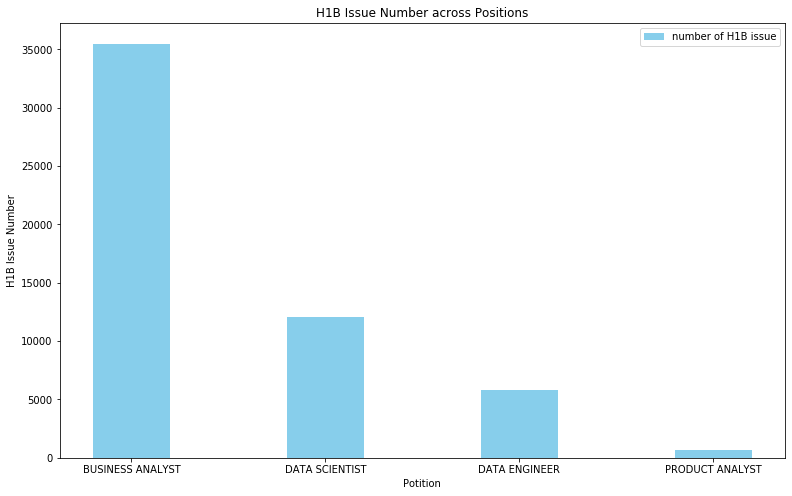

In [37]:
list_of_dataframe = [bs, pa, ds, de]
position_comparison_ttl(list_of_dataframe)

In [38]:
all_df.head()

,employer,job title,base salary,location,submit date,start date,case status,state,year,month
0,EXPERIS US INC,BUSINESS ANALYST,24000,SAN JUAN PR,2015-07-01,2015-07-15,CERTIFIED,PR,2015,7
1,EXPERIS US INC,BUSINESS ANALYST,28000,OKLAHOMA CITY OK,2015-06-29,2015-07-15,CERTIFIED,OK,2015,6
2,KFORCE INC,BUSINESS ANALYST,32000,RANCHO CORDOVA CA,2016-07-25,2016-07-25,CERTIFIED,CA,2016,7
3,GH DESIGN GROUP LLC,BUSINESS ANALYST,33060,ONTARIO CA,2017-03-08,2017-09-07,CERTIFIED,CA,2017,3
4,LTS ASSOCIATE INC,BUSINESS ANALYST,33860,PORT WASHINGTON NY,2019-05-02,2019-10-23,CERTIFIED,NY,2019,5


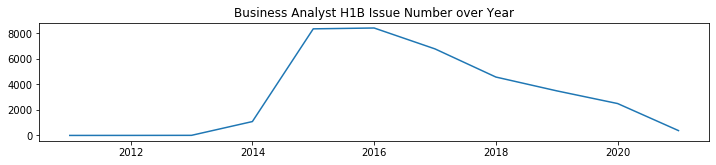

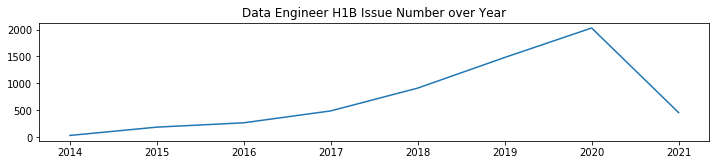

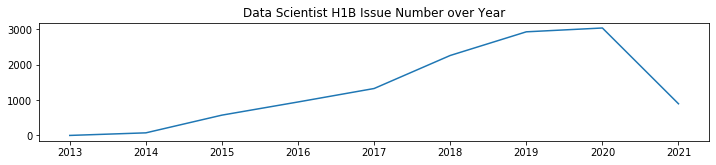

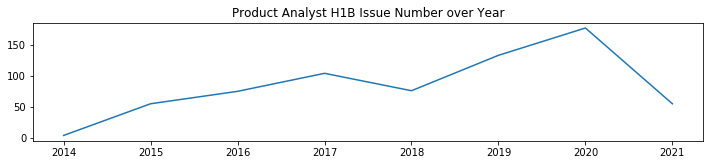

In [39]:
list_of_dataframe = [bs, pa, ds, de]
position_no_yearly(list_of_dataframe)

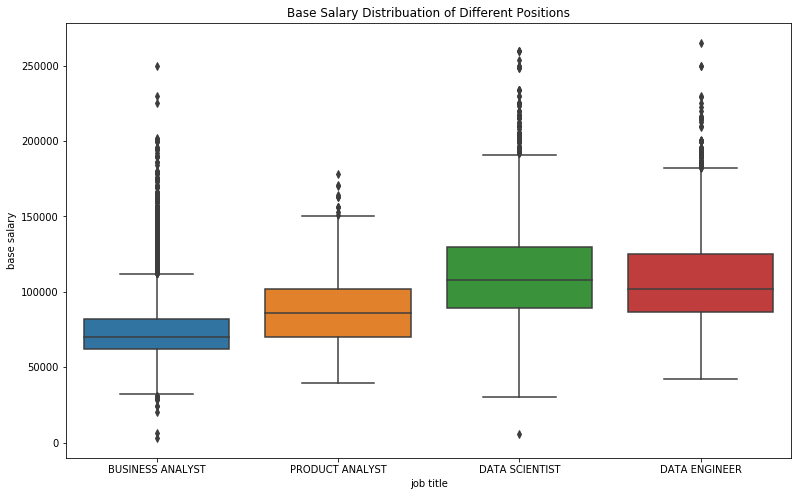

In [40]:
list_of_dataframe = [bs, pa, ds, de]
position_salary_compare(list_of_dataframe)